## Linear Regression


### Regression
#### Regression searches for relationships among variables, you need regression to answer whether and how some phenomenon influences the other or how several variables are related, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

#### Pros 
 - very simple to work with 
 - easy to interpret results

#### Cons
 - numerical values only, categorical will not work 

### Model Set Up

#### Steps
 - load the data
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### Single-linear Rergression
 - a straight-line fit to data
 - simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥
 - y = ax+b, where a is commonly known as the slope, and b is commonly known as the intercept

#### Multi-Linear Regression
 - a straight-line fit to data
 - multiple or multivariate linear regression icd s a case of linear regression with two or more independent variables


### Models

#### Import + Inspect 

In [70]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/LRM_Notes/medical_insurance.csv') # read in the file 
print('data frame shape:', df.shape) 
df.head() 

data frame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) 
print('--- types --- ')
print(df.dtypes) 
print('--- NA counts --- ')
print(df.isna().sum()) 
print('--- object descriptions --- ')
print(df.describe(include=object))
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
--- types --- 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
--- NA counts --- 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
--- object descriptions --- 
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364
--- numericals descriptions --- 


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


--- feature correlations heatmap ---


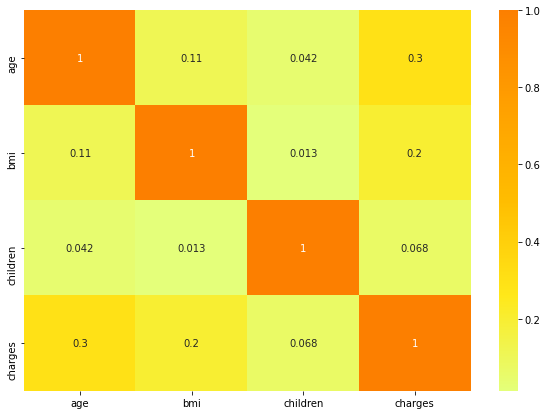

In [73]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, 1, figsize = (10, 7))
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- scatter plots ---


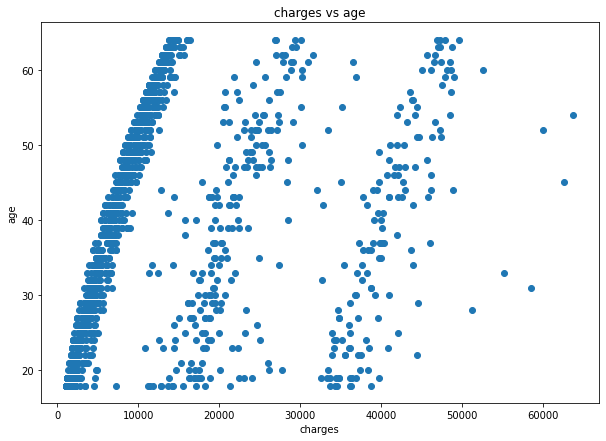

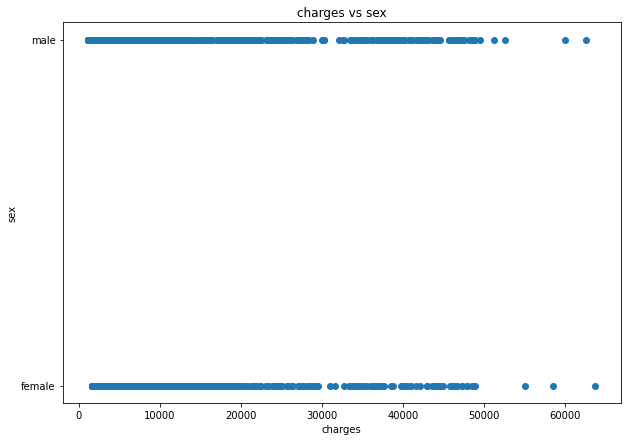

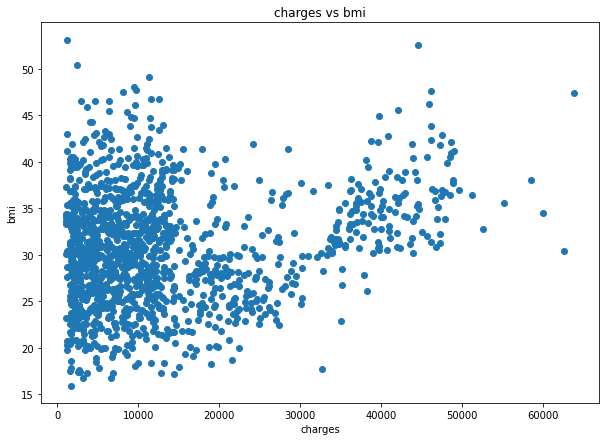

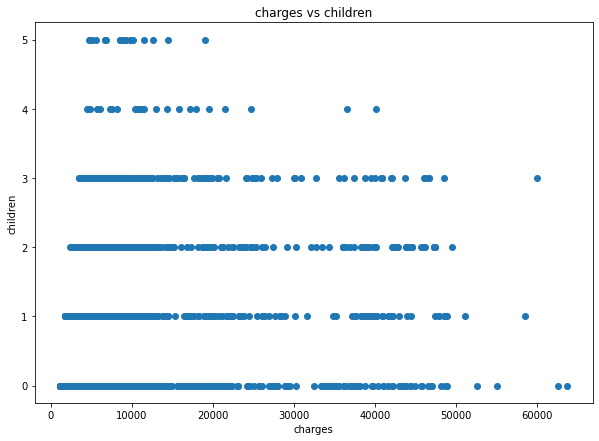

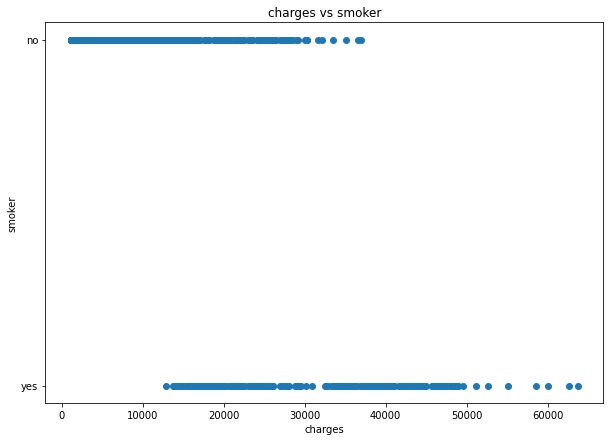

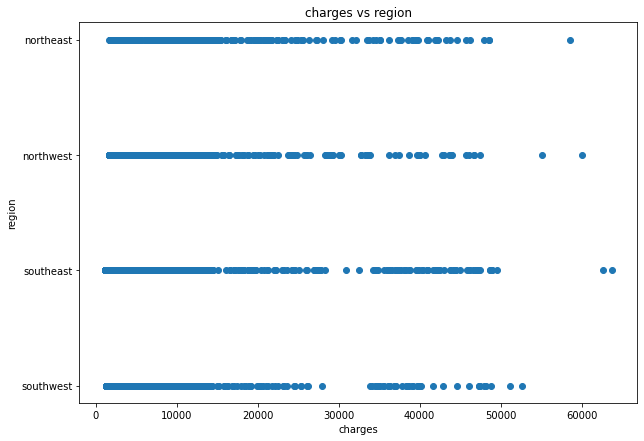

In [74]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'charges' # set the target
features_ = df.iloc[:, 0:6] # set the features
print('--- scatter plots ---')
for feature in features_:
    figure = plt.figure
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    ax = plt.gca()
    ax.scatter(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

#### Encode + Clean + Organize 





In [75]:
### use label encoder on the data frame ###
# encoding for 'sex', 'smoker', 'region'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(le.fit_transform) 
print('data frame shape:', df.shape)
df.head() 

data frame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Figure size 432x288 with 0 Axes>

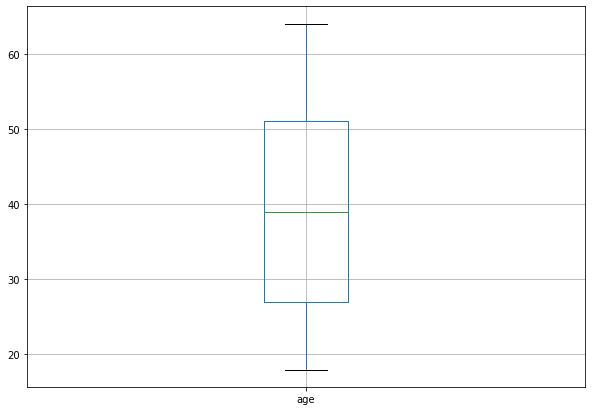

<Figure size 432x288 with 0 Axes>

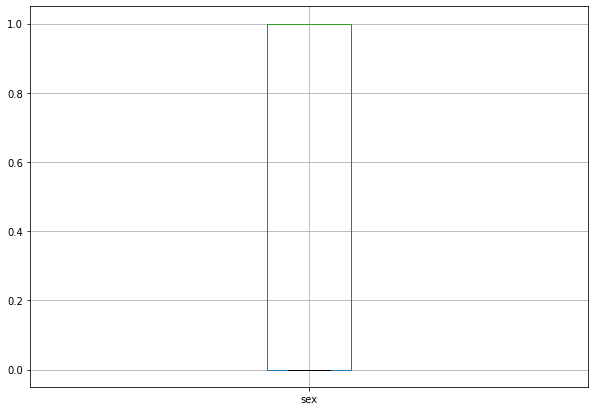

<Figure size 432x288 with 0 Axes>

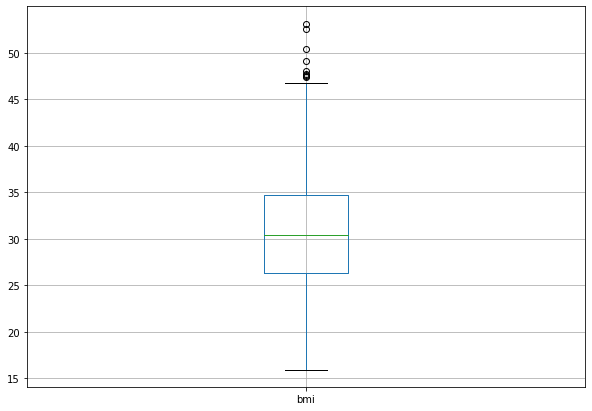

<Figure size 432x288 with 0 Axes>

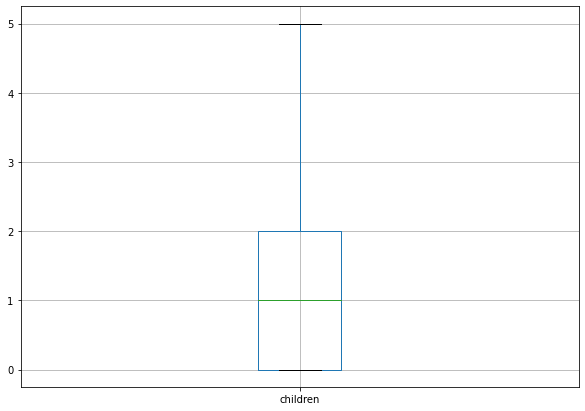

<Figure size 432x288 with 0 Axes>

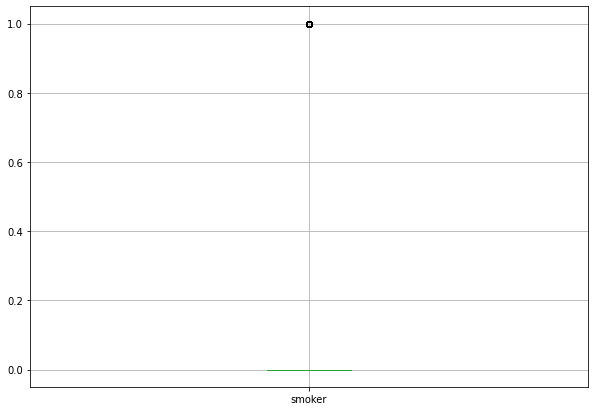

<Figure size 432x288 with 0 Axes>

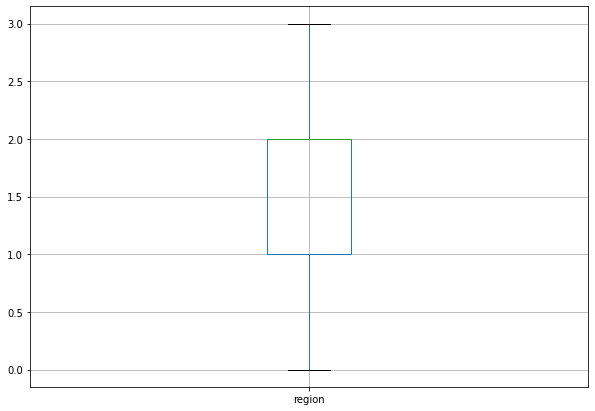

<Figure size 432x288 with 0 Axes>

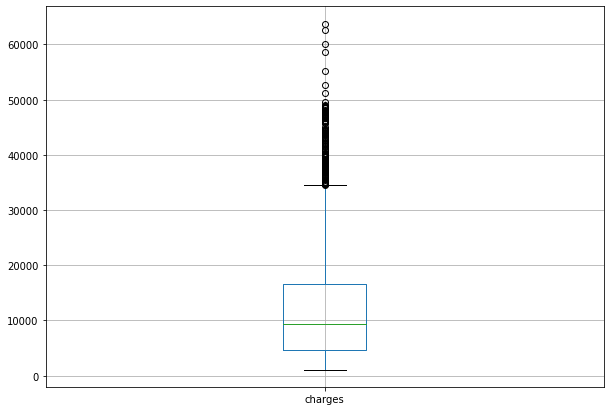

In [76]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    df.boxplot([column]) # set data

In [77]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] 
    zscore = [] 
    threshold = 3.5 # set threshold 
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the zscore
        if np.abs(z_score) > threshold: 
            outliers.append(i) # append z_score the outliers
    print(outliers)
    return len(outliers), outliers

In [78]:
### run each feature 'wanted' through the function ### 
print('--- possible outliers --- ')
age_outliers_number, age_outliers = outlier_zscore(df.age)
sex_outliers_number, sex_outliers = outlier_zscore(df.sex)
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)
children_outliers_number, children_outliers = outlier_zscore(df.children)
smoker_outliers_number, smoker_outliers = outlier_zscore(df.smoker)
region_outliers_number, region_outliers = outlier_zscore(df.region)
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)


--- possible outliers --- 
[]
[]
[52.58, 53.13]
[]
[]
[]
[63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


In [79]:
### removal of outliers per feature ###
for num, i in enumerate(df['bmi']): 
    if i in bmi_outliers:
        df['bmi'][num] = 48.5 # choose replacement score
for num, i in enumerate(df['charges']): 
    if i in charges_outliers:
        df['charges'][num] = 55000.00 # choose replacement score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### Single Linear Regression Model
 - GridSearch CV 
 - RandomizedSearch CV

In [80]:
### copy the data frame ### 
df1 = df.copy()

In [81]:
### split the data into features & target sets ###
# for single regression select the 1 feature 
X = df1.iloc[:, 0:1].values # set the features
y = df1.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 1)
y shape: (1338,)


In [82]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [83]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [84]:
### single linear regression model ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
print('--- model runtime --- ')
%time model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model.intercept_) # get the intercept
print('coefficients:', model.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 1.39 ms, sys: 0 ns, total: 1.39 ms
Wall time: 1.5 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      16241.987393
1   8547.69130      15055.114571
2  45702.02235      15292.489135
3  12950.07120      18378.358474
4   9644.25250      16004.612829
--- model metrics ---
mean absolute error: 9137.500519465078
mean squared error: 139224992.0109984
root mean squared error: 11799.364051125738
intercept: 13177.8589022243
coefficients: [3342.62283416]
r2 score : 0.12508625038717558
model score: 0.07909921415370014
model accuracy: 12.508625038717557%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


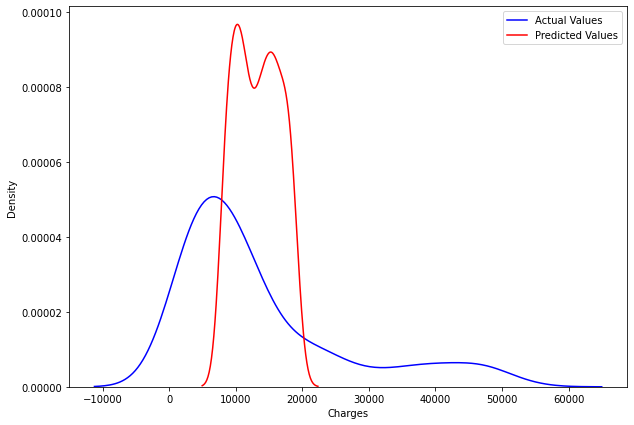

In [85]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### GridSearch CV

In [86]:
### copy the data frame ###
df2 = df.copy()

In [87]:
### split the data into features & target sets ###
# for single regression select 1 feature
X = df2.iloc[:, 0:1].values # set the features
y = df2.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 1)
y shape: (1338,)


In [88]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [89]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [90]:
### linear regression + grid search CV model ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model1 = LinearRegression()
param_grid = {  # create the param grid 
            'copy_X': [True, False], 
            'fit_intercept': [True, False], 
            'n_jobs' : [2, 10, 20], 
            'normalize' : [True, False], 
              }
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 116 ms, sys: 752 µs, total: 117 ms
Wall time: 121 ms


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': False}

In [91]:
### linear regression model + grid best params ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model1 = LinearRegression(
                          copy_X= True,
                          fit_intercept= True,
                          n_jobs= 2,
                          normalize= False
                          )
print('--- model runtime --- ')
%time model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---') 
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model1.intercept_) # get the intercept
print('coefficients:', model1.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 565 µs, sys: 56 µs, total: 621 µs
Wall time: 628 µs
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      16241.987393
1   8547.69130      15055.114571
2  45702.02235      15292.489135
3  12950.07120      18378.358474
4   9644.25250      16004.612829
--- model metrics ---
mean absolute error: 9137.500519465078
mean squared error: 139224992.0109984
root mean squared error: 11799.364051125738
intercept: 13177.8589022243
coefficients: [3342.62283416]
r2 score : 0.12508625038717558
model score: 0.07909921415370014
model accuracy: 12.508625038717557%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


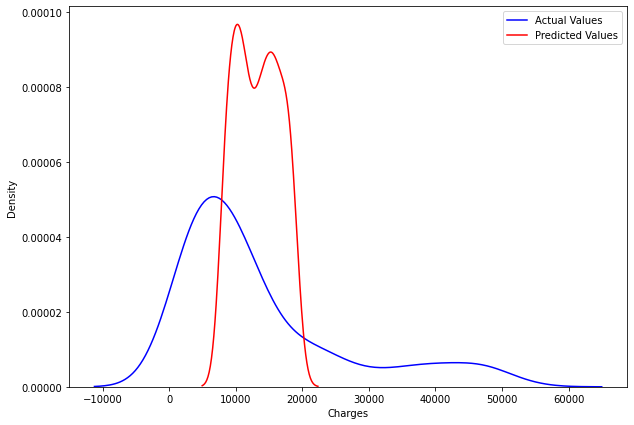

In [92]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### RandomizedSearch CV

In [93]:
### copy the data frame ###
df3 = df.copy()

In [94]:
### split the data into features & target sets ###
# for single regression select the 1 feature
X = df3.iloc[:, 0:1].values # set the features
y = df3.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape)
print('y shape:', y.shape)

--- data shapes --- 
X shape: (1338, 1)
y shape: (1338,)


In [95]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [96]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [97]:
### linear regression + randomized search CV model ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
model2 = LinearRegression()
param_grid = {  # create the param grid 
            'copy_X': [True, False], 
            'fit_intercept': [True, False], 
            'n_jobs' : [2, 20], 
            'normalize' : [True, False], 
              }
CV_rfc = RandomizedSearchCV(model2, param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 47 ms, sys: 1.98 ms, total: 49 ms
Wall time: 53.3 ms
--- best params --- 


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 20, 'normalize': False}

In [98]:
### linear regression model + randomized best params ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model2 = LinearRegression(
                          copy_X = True,
                          fit_intercept = True,
                          n_jobs = 20,
                          normalize = False
                          )
print('--- model runtime --- ')
%time model2.fit(X_train, y_train) 
y_pred = model2.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns = ["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns = ["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis = 1) 
print('--- real values vs predicted values ---') 
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model2.intercept_) # get the intercept
print('coefficients:', model2.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model2.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 1.26 ms, sys: 25 µs, total: 1.29 ms
Wall time: 1.16 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      16241.987393
1   8547.69130      15055.114571
2  45702.02235      15292.489135
3  12950.07120      18378.358474
4   9644.25250      16004.612829
--- model metrics ---
mean absolute error: 9137.500519465078
mean squared error: 139224992.0109984
root mean squared error: 11799.364051125738
intercept: 13177.8589022243
coefficients: [3342.62283416]
r2 score : 0.12508625038717558
model score: 0.07909921415370014
model accuracy: 12.508625038717557%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


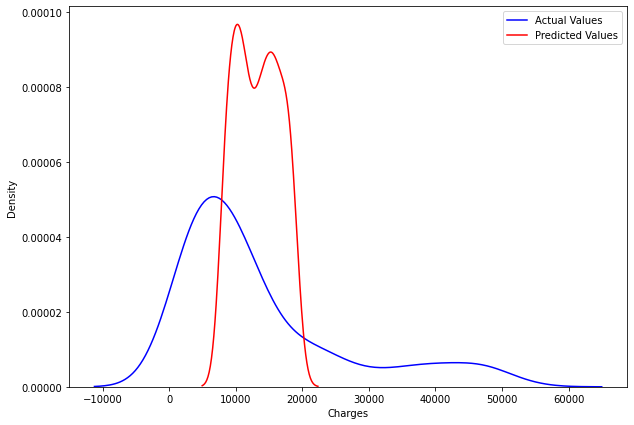

In [99]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

#### Multi Linear Regression
 - GridSearchCV
 - RandomizedSearch CV

In [100]:
### copy the data frame ###
df4 = df.copy()

In [101]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df4.iloc[:, 0:6].values # set the features
y = df4.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 6)
y shape: (1338,)


In [102]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [103]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [104]:
### multi linear regression model ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model3 = LinearRegression() 
print('--- model runtime --- ')
%time model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---') 
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model3.intercept_) # get the intercept
print('coefficients:', model3.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model3.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 2.06 ms, sys: 5 µs, total: 2.07 ms
Wall time: 1.77 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      11013.367321
1   8547.69130       9780.829372
2  45702.02235      37847.999767
3  12950.07120      16068.361818
4   9644.25250       6948.154879
--- model metrics ---
mean absolute error: 3932.580632691409
mean squared error: 31915676.739050288
root mean squared error: 5649.396139327661
intercept: 13177.85890222429
coefficients: [ 3.55870086e+03 -7.53290936e+00  2.00136161e+03  5.44274944e+02
  9.46322980e+03 -3.16031360e+02]
r2 score : 0.7994364086227607
model score: 0.7401587155026317
model accuracy: 79.94364086227607%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


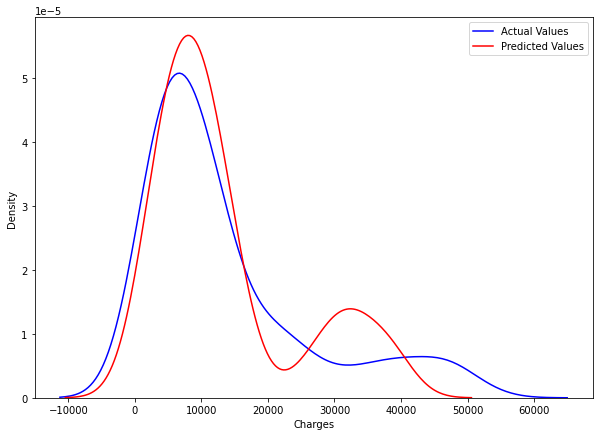

In [105]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### GridSearch CV

In [106]:
### copy the data frame ###
df5 = df.copy()

In [107]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df5.iloc[:, 0:6].values # set the features
y = df5.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape)
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 6)
y shape: (1338,)


In [108]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [109]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [110]:
### linear regression + grid search CV model ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model4 = LinearRegression()
param_grid = {  # create the param grid 
            'copy_X': [True, False], 
            'fit_intercept': [True, False], 
            'n_jobs' : [2, 10, 20], 
            'normalize' : [True, False], 
              }
CV_rfc = GridSearchCV(estimator=model4, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 114 ms, sys: 785 µs, total: 115 ms
Wall time: 121 ms
--- best params --- 


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [111]:
### linear regression model + grid best params ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model4 = LinearRegression(
                          copy_X= True,
                          fit_intercept= True,
                          n_jobs= 2,
                          normalize= True
                          )
print('--- model runtime --- ')
%time model4.fit(X_train, y_train) 
y_pred = model4.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---') 
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model4.intercept_) # get the intercept
print('coefficients:', model4.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model4.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 1.59 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      11013.367321
1   8547.69130       9780.829372
2  45702.02235      37847.999767
3  12950.07120      16068.361818
4   9644.25250       6948.154879
--- model metrics ---
mean absolute error: 3932.580632691409
mean squared error: 31915676.739050288
root mean squared error: 5649.396139327661
intercept: 13177.85890222429
coefficients: [ 3.55870086e+03 -7.53290936e+00  2.00136161e+03  5.44274944e+02
  9.46322980e+03 -3.16031360e+02]
r2 score : 0.7994364086227607
model score: 0.7401587155026317
model accuracy: 79.94364086227607%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


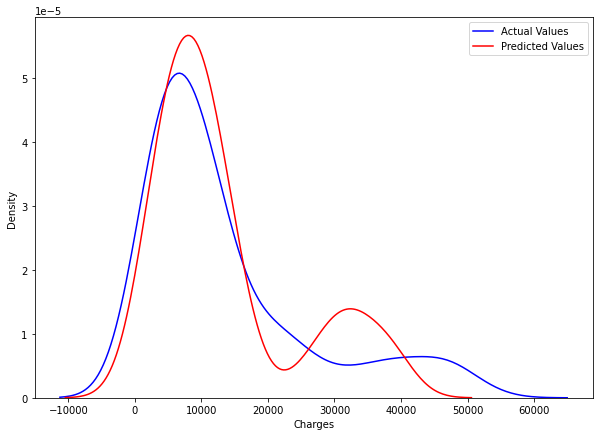

In [112]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### RandomizedSearch CV

In [130]:
### copy the data frame ###
df6 = df.copy()

In [131]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df6.iloc[:, 0:6].values # set the features
y = df6.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 6)
y shape: (1338,)


In [132]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [133]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [128]:
### linear regression + randomized search CV model ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
model5 = LinearRegression()
param_grid = {  # create the param grid 
            'copy_X': [True, False], 
            'fit_intercept': [True, False],
            'n_jobs' : [2, 20], 
            'normalize' : [True, False], 
              }
CV_rfc = RandomizedSearchCV(model5, param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 43.1 ms, sys: 0 ns, total: 43.1 ms
Wall time: 43.2 ms
--- best params --- 


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 20, 'normalize': False}

In [134]:
### linear regression model + randomized best params ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model5 = LinearRegression(
                          copy_X= True,
                          fit_intercept= True,
                          n_jobs= 20,
                          normalize= False
                          )
print('--- model runtime --- ')
%time model5.fit(X_train, y_train)
y_pred = model5.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model5.intercept_) # get the intercept
print('coefficients:', model5.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model5.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 1.51 ms, sys: 46 µs, total: 1.56 ms
Wall time: 1.32 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      11013.367321
1   8547.69130       9780.829372
2  45702.02235      37847.999767
3  12950.07120      16068.361818
4   9644.25250       6948.154879
--- model metrics ---
mean absolute error: 3932.580632691409
mean squared error: 31915676.739050288
root mean squared error: 5649.396139327661
intercept: 13177.85890222429
coefficients: [ 3.55870086e+03 -7.53290936e+00  2.00136161e+03  5.44274944e+02
  9.46322980e+03 -3.16031360e+02]
r2 score : 0.7994364086227607
model score: 0.7401587155026317
model accuracy: 79.94364086227607%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


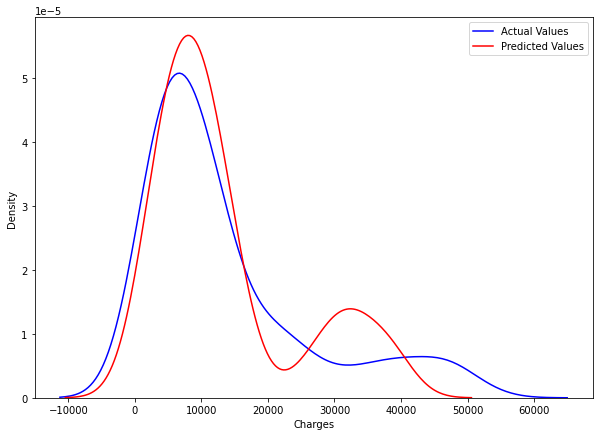

In [135]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()